In [ ]:
import pandas as pd
import pickle
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

## EDA


In [2]:

df = pd.read_csv("SolarPrediction.csv")
df = df.dropna()

     UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
4     30.46        62                  104.95   5.62    06:13:00   18:13:00  
           UNIXTime     Radiation   Temperature      Pressure      Humidity  \
count  3

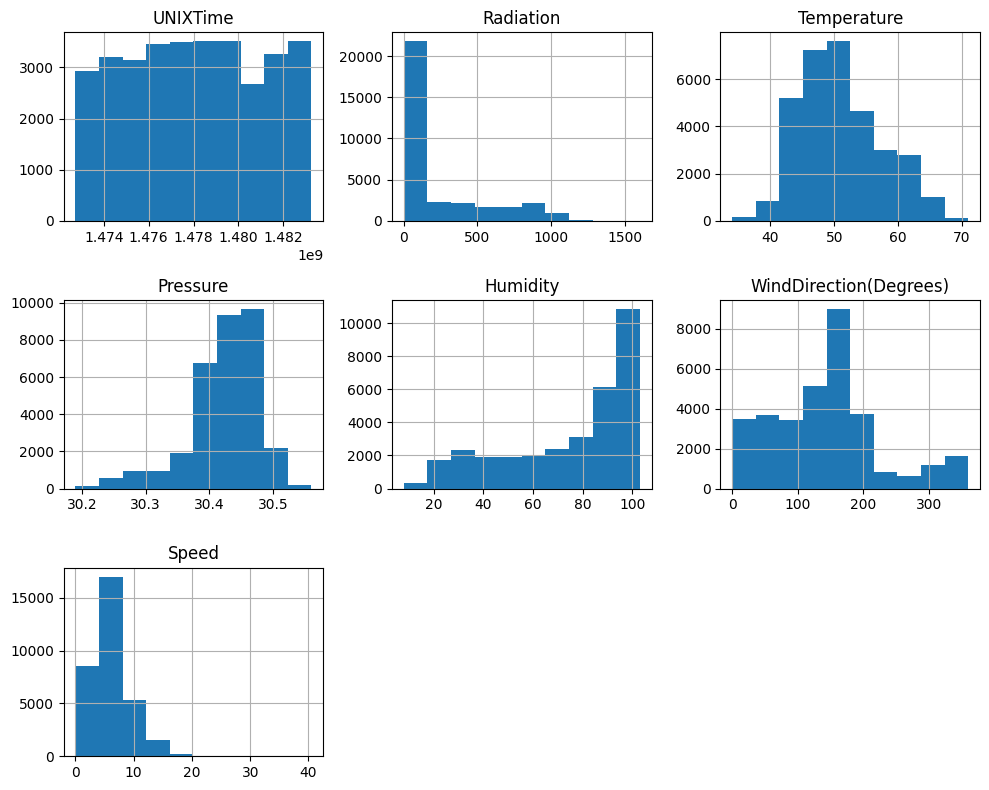

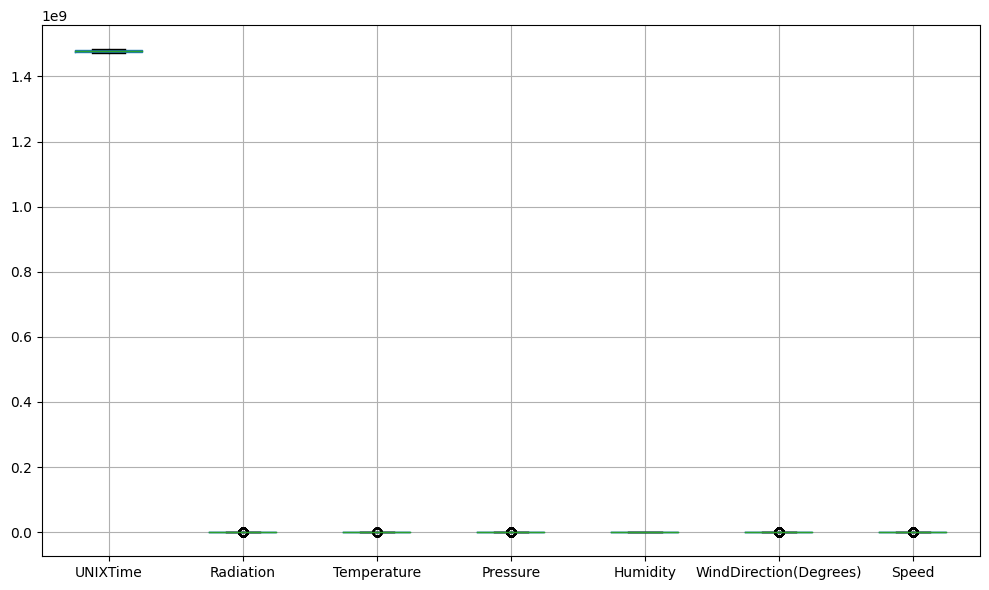

C:\Users\Aryan\AppData\Local\Temp\ipykernel_5968\1728171479.py:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


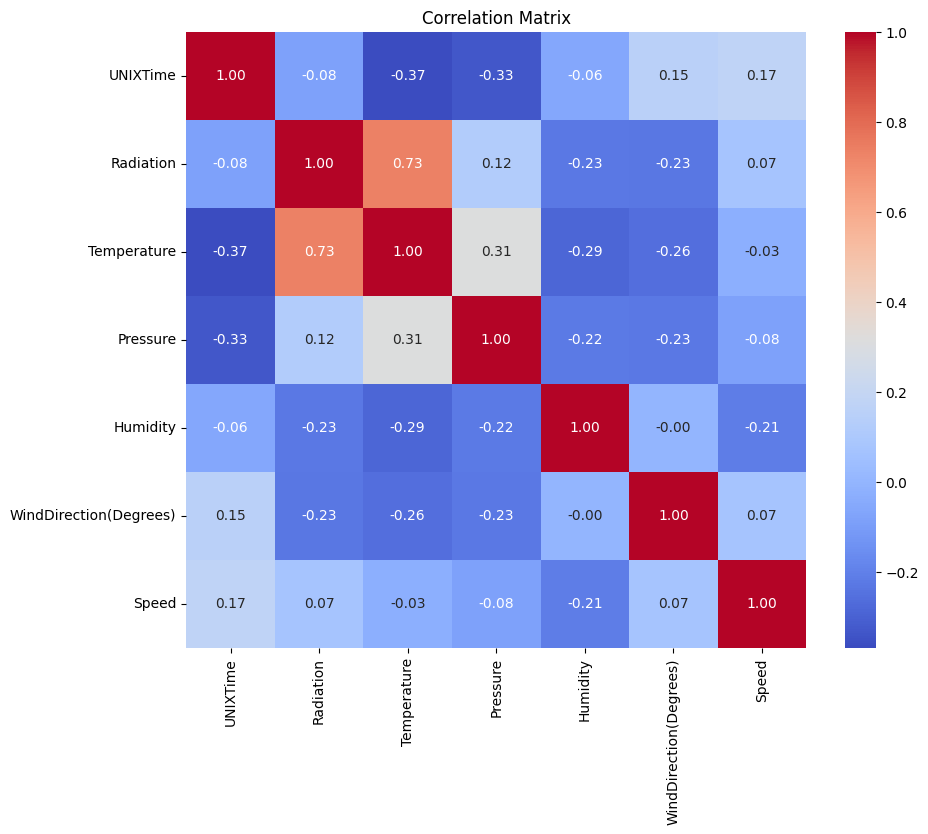

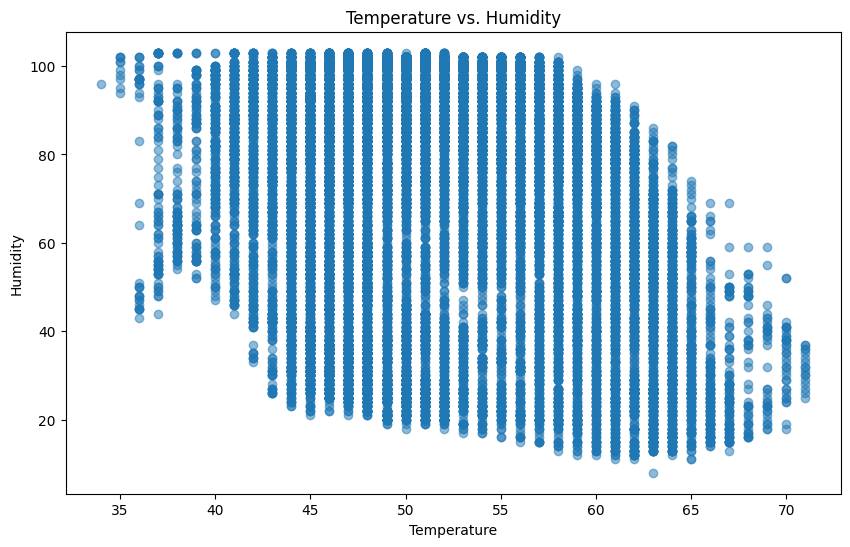

In [7]:
data = df

print(data.head())

print(data.describe())

print(data.isnull().sum())

data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Box plots
data.boxplot(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Scatter plot (example)
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['Humidity'], alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs. Humidity')
plt.show()

### Anomaly Detection


In [7]:
df = pd.read_csv("SolarPrediction.csv")
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [8]:
df = df[:: 12]
selected_columns = ['Radiation', 'Temperature',
                    'Humidity', 'WindDirection(Degrees)', 'Speed']
df = df[selected_columns]

In [11]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
model = IsolationForest(contamination=0.05)
model.fit(data_scaled)

with open('isolation_forest_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

### EDA


In [34]:
soil_moisture = pd.read_csv('soil_moisture.csv')

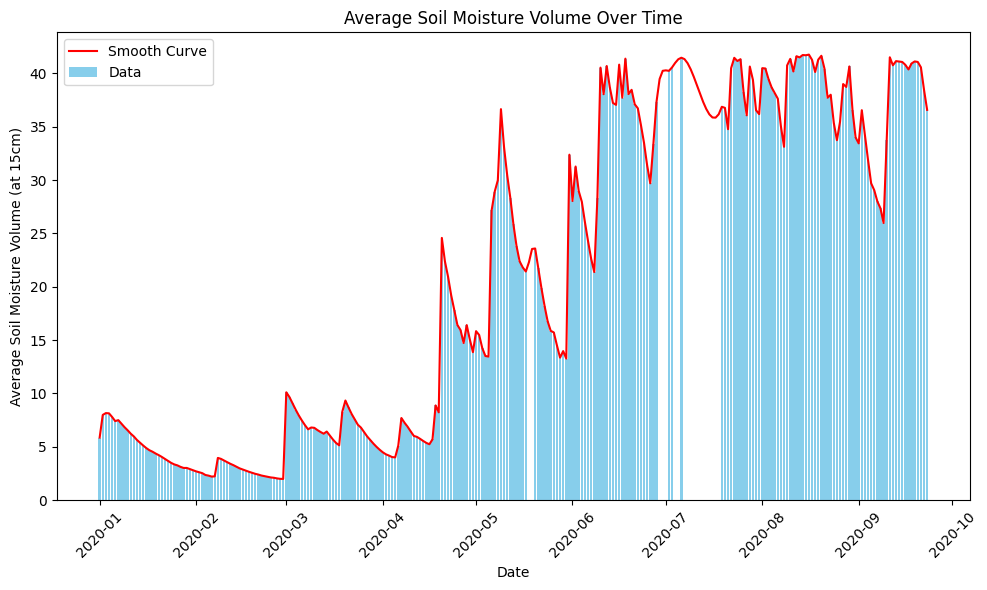

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

soil_moisture = pd.read_csv('soilmoist.csv')
soil_moisture['Date'] = pd.to_datetime(soil_moisture['Date'])

soil_moisture.sort_values(by='Date', inplace=True)

x = soil_moisture['Date']
y = soil_moisture['Average SoilMoisture Volume (at 15cm)']

plt.figure(figsize=(10, 6))

plt.bar(x, y, color='skyblue', label='Data')

x_smooth = pd.date_range(start=x.min(), end=x.max(), freq='D')
spl = make_interp_spline(x, y)
y_smooth = spl(x_smooth)

plt.plot(x_smooth, y_smooth, color='red', label='Smooth Curve')

plt.title('Average Soil Moisture Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Average Soil Moisture Volume (at 15cm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()